# Introduction

*Saccharomyces cerevisiae* is a yeast, a small single-cell eukaryote, known for its fermentation abilities. It has been used for winemaking, baking, and brewing since first emerging civilizations. Thanks to its characteristics, *Saccharomyces cerevisiae* is examined as a convenient model organism.

We are going to study its  gene regulatory network using graph theory and python **networkx** library.

# Exploration and characterization of the gene regulatory network

In [1]:
import networkx as ntx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import pygraphviz as pgv
ntx.__version__

'2.0'

The file *GRN_edges_S_cerevisiae.txt* contains the edges between transcription factors and target genes. It will serve us to create our graph. We drop the first colomn which has no further interest.

In [2]:
network = pd.read_csv("GRN_edges_S_cerevisiae.txt", sep = ',', header=0)
gene = pd.read_table("net4_gene_ids.tsv", sep = '\t')
transcription= pd.read_table('net4_transcription_factors.tsv')
mapping = pd.read_table('go_slim_mapping.tab.txt', header = None)

In [3]:
network = network.drop('Unnamed: 0', axis=1)
network.head()

,transcription_factor,target_gene
0,G15,G1
1,G98,G1
2,G109,G1
3,G22,G9
4,G211,G11


In [4]:
gene.head()

,ID,Name
0,G1,YHR084W
1,G2,YER109C
2,G3,YDR496C
3,G4,YBR098W
4,G5,YNL139C


In [5]:
transcription.head()

,transcription_factor
0,G1
1,G2
2,G3
3,G4
4,G5


In [6]:
mapping.head()

,0,1,2,3,4,5,6
0,HRA1,HRA1,S000119380,C,cellular_component,GO:0005575,ncRNA_gene
1,HRA1,HRA1,S000119380,F,molecular_function,GO:0003674,ncRNA_gene
2,HRA1,HRA1,S000119380,P,rRNA processing,GO:0006364,ncRNA_gene
3,HRA1,HRA1,S000119380,P,ribosomal small subunit biogenesis,GO:0042274,ncRNA_gene
4,ICR1,ICR1,S000132612,C,nucleus,GO:0005634,ncRNA_gene


In [4]:
G = ntx.DiGraph()
G = ntx.from_pandas_edgelist(network, 'transcription_factor', 'target_gene', create_using = ntx.DiGraph())
ntx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 1994\nNumber of edges: 3940\nAverage in degree:   1.9759\nAverage out degree:   1.9759'

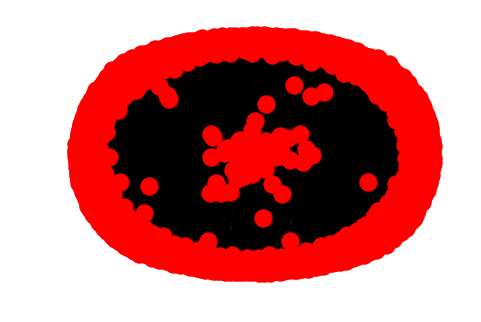

In [5]:
ntx.draw(G)

We draw the network using *draw()* method. This image is not really clear. In order to get a better representation of the graph, we have to find another method.

In [6]:
both_genes = set(network['transcription_factor']).intersection(network['target_gene'])
regulatory_genes = set(network['transcription_factor']) - set(both_genes)
target_genes = set(network['target_gene']) - set(both_genes)

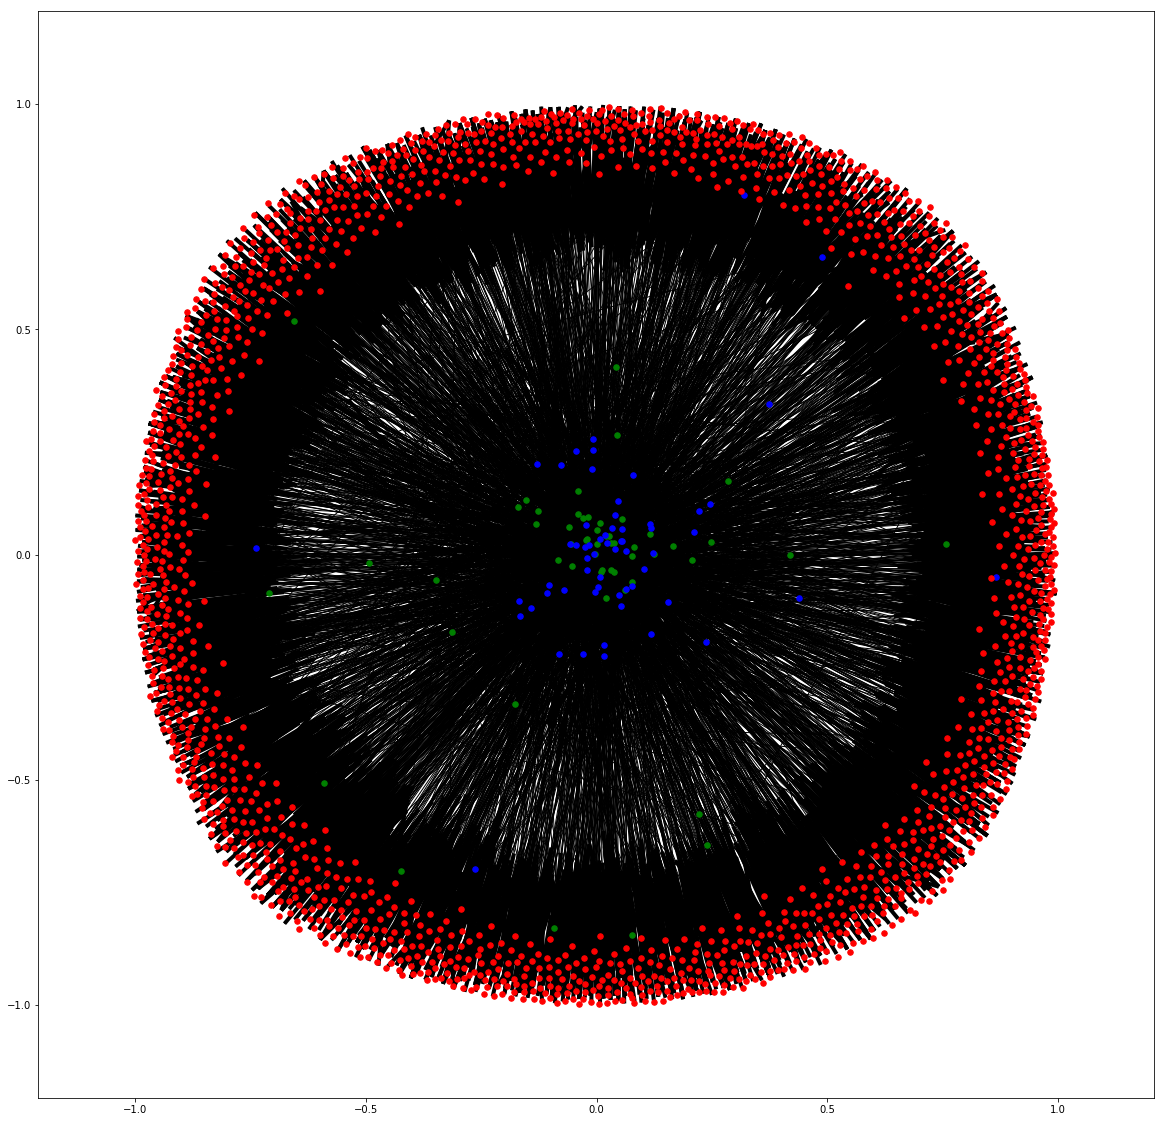

In [7]:
plt.figure(figsize=(20,20))
ntx.draw_networkx_edges(G, pos = ntx.spring_layout(G), edgelist = list(G.edges()))
ntx.draw_networkx_nodes(G, nodelist= list(both_genes), 
                       node_color = 'g',  pos = ntx.spring_layout(G), with_labels = False, node_size = 30)
ntx.draw_networkx_nodes(G, nodelist= list(regulatory_genes), 
                       node_color = 'b',  pos = ntx.spring_layout(G), with_labels = False, node_size = 30)
ntx.draw_networkx_nodes(G, nodelist=list(target_genes) , 
                       node_color = 'r',  pos = ntx.spring_layout(G), with_labels = False, node_size = 30)

Even though this image gives us a better idea about the disposition of factors and genes in the graph, we would like to get a figure that specifies if there are some particular parts in the graph. For that, we'll use the *nx_agraph.graphviz_layout* method. (if it will work some day)

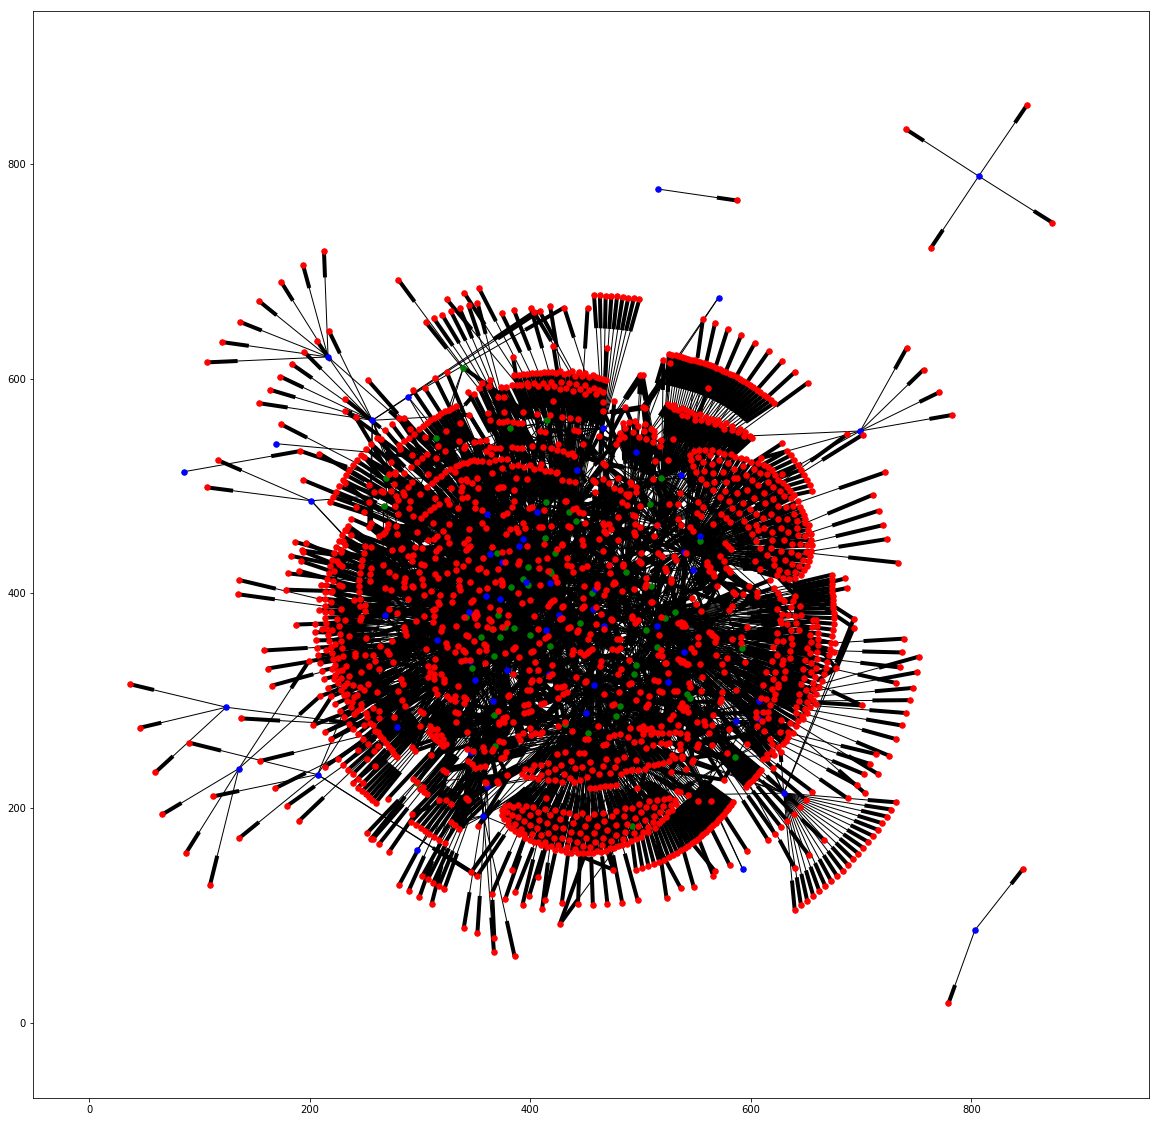

In [10]:
plt.figure(figsize=(20,20))
ntx.draw_networkx_edges(G, pos = ntx.nx_agraph.graphviz_layout(G), edgelist = list(G.edges()))
ntx.draw_networkx_nodes(G, nodelist= list(both_genes), node_color = 'g', \
                        pos = ntx.nx_agraph.graphviz_layout(G), with_labels = False, node_size = 30)
ntx.draw_networkx_nodes(G, nodelist= list(regulatory_genes), node_color = 'b',  \
                        pos = ntx.nx_agraph.graphviz_layout(G), with_labels = False, node_size = 30)
ntx.draw_networkx_nodes(G, nodelist=list(target_genes) , node_color = 'r', \
                        pos = ntx.nx_agraph.graphviz_layout(G), with_labels = False, node_size = 30)

In [126]:
def draw_agraph(G, nodes):
    plt.figure(figsize=(20,20))
    col = ['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef', '#deebf7', '#f7fbff']
    ntx.draw_networkx_edges(G, pos = ntx.nx_agraph.graphviz_layout(G), edgelist = list(G.edges()))
    for i in range(len(nodes)):
        ntx.draw_networkx_nodes(G, pos = ntx.nx_agraph.graphviz_layout(G), \
                                nodelist = nodes[i], node_color = col[i], \
                                with_labels = False, node_size = 30)

We will study the network by computing some of its characteristics.

#### Clustering coefficient

#### Betweeness centrality

(array([1.967e+03, 4.000e+00, 3.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.00000000e+00, 4.10917797e-05, 8.21835595e-05, 1.23275339e-04,
        1.64367119e-04, 2.05458899e-04, 2.46550678e-04, 2.87642458e-04,
        3.28734238e-04, 3.69826018e-04, 4.10917797e-04, 4.52009577e-04,
        4.93101357e-04, 5.34193136e-04, 5.75284916e-04, 6.16376696e-04,
        6.57468476e-04, 6.98560255e-04, 7.39652035e-04, 7.80743815e-04,
        8.218355

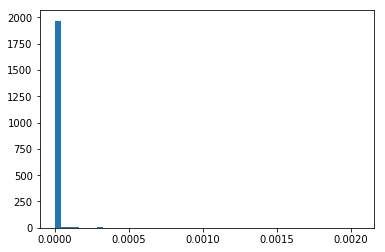

In [29]:
btw_ctr = ntx.betweenness_centrality(G)
plt.hist(btw_ctr.values(), bins=50)


Betweeness centality is defined as the number of shortest paths, among any pair of nodes, passing by a given vertex (node). 

#### Degrees in and out

In [13]:
adj_G = ntx.to_numpy_matrix(G, nodelist=G.nodes())
adjacency = pd.DataFrame(adj_G)
in_degree = adjacency.sum(axis=0).sort_values() 
out_degree = adjacency.sum(axis=1).sort_values() 

14.0


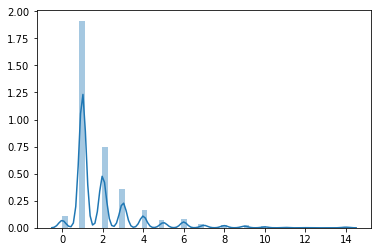

In [14]:
in_dict = {}
for node in G.nodes:
    in_dict[node] = G.in_degree(node)
    
print(max(in_degree))
sns.distplot(in_degree)

217.0


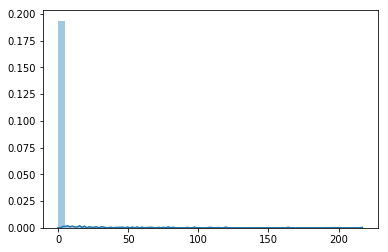

In [15]:
out_dict = {}
for node in G.nodes:
    out_dict[node] = G.out_degree(node)
print(max(out_degree))
sns.distplot(out_degree)


## K-shell decomposition

K–shell (or k–core) decomposition is an algorithm for analyzing the structure of large–scale graphs and it provides a method for identifying hierarchies in a network.

('k', 1)
('nb of nodes', 941)
('k', 2)
('nb of nodes', 524)
('k', 3)
('nb of nodes', 293)
('k', 4)
('nb of nodes', 184)
('k', 5)
('nb of nodes', 112)
('k', 6)
('nb of nodes', 55)
('k', 7)
('nb of nodes', 0)
('k', 1)
('nb of nodes', 941)
('k', 2)
('nb of nodes', 524)
('k', 3)
('nb of nodes', 293)
('k', 4)
('nb of nodes', 184)
('k', 5)
('nb of nodes', 112)
('k', 6)
('nb of nodes', 55)
('k', 7)
('nb of nodes', 0)


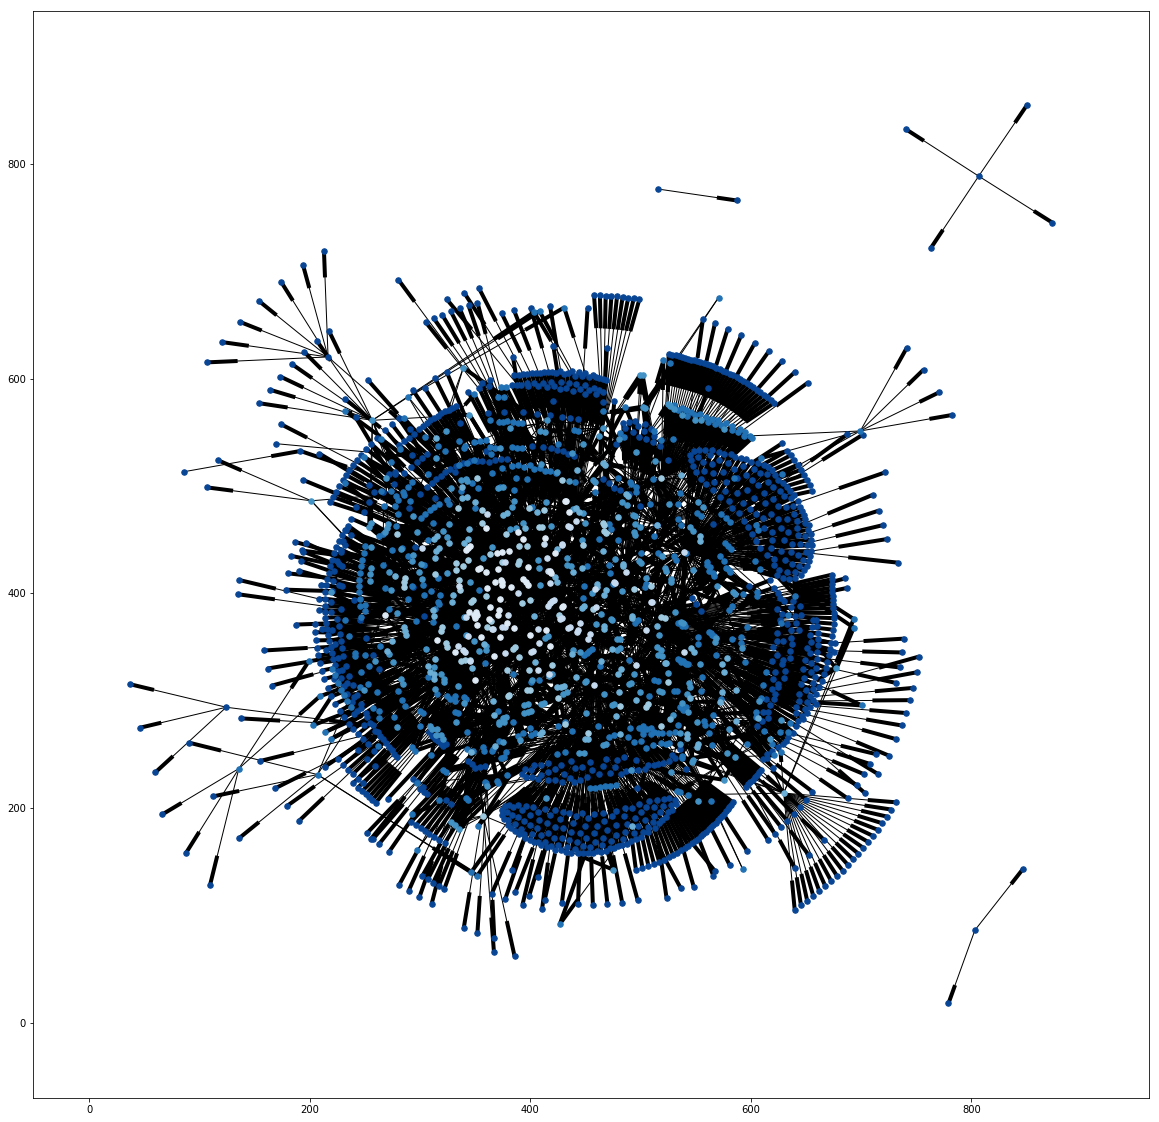

In [128]:
def k_shell(G):
    k = 1
    G_ = G.copy()
    k_shell = []
    k_core = []
    
    degrees = list(G_.degree())
    only_deg = []
    for i in range(len(degrees)):
        only_deg.append(degrees[i][1])
    
    while G_.number_of_nodes() > 0:
        while True in [True for c in range(k+1) if c in only_deg]:
            for n, d in list(G_.degree()):
                if d <= k :
                    if len(k_shell) >= k:
                        k_shell[k-1].append(n)
                    else:
                        k_shell.append([n])
                    G_.remove_node(n)
            
            degrees = list(G_.degree())
            only_deg = []
            for i in range(len(degrees)):
                only_deg.append(degrees[i][1])
                
        k_core.append(list(G_.nodes()))
        print("k", k)
        print("nb of nodes", G_.number_of_nodes()) 
        k = k+1
    return k_core, k_shell
                
k_shell(G)[1][6]
draw_agraph(G, k_shell(G)[1])

White - the true core, blue - the first shell.

# Community detection

### Girvan–Newman algorithm

L'algorithme de Girvan–Newman est une méthode qui sert à trouver des communautés dans des graphes complexes.
Le but de cette méthode est d'identifier les edges qui se trouvent probablement entre les communauté, de les enlever et donc de récuperer les communautés individuelles.

L'algorhitme procéde de cette manière :
- calculer la *betweennes* de tous les edges du graphe
- enlever les edges ayant la *betweennes* plus élevée
- recalculer la *betweennes* des edges concernés
- refaire les étapes 2 et 3

En effet, les premiers edges à enlever auront la plus grande *betweennes* et donc seront beaucoup utilisés pour effectuer le passage le plus court entre 2 noeuds du graphe. Ce sont alors bien les edges qui servent comme des "ponts" entre les différentes communautés et sont beaucoup parcourus pour passer d'un côté du graphe à l'autre.

In [19]:
import itertools

k = 4
comp = ntx.algorithms.community.centrality.girvan_newman(G)

In [20]:
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    print(tuple(comm for comm in communities)) 

###  Louvain algorithm 

In [18]:
ntx.community.best_partition(G)

AttributeError: 'module' object has no attribute 'best_partition'

# Conclusion